In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_dots = 30

x = np.linspace(0, 1, n_dots)                   # [0, 1] 之间创建 20 个点
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1;

In [11]:
def plot_polynomial_fit(x, y, order):
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

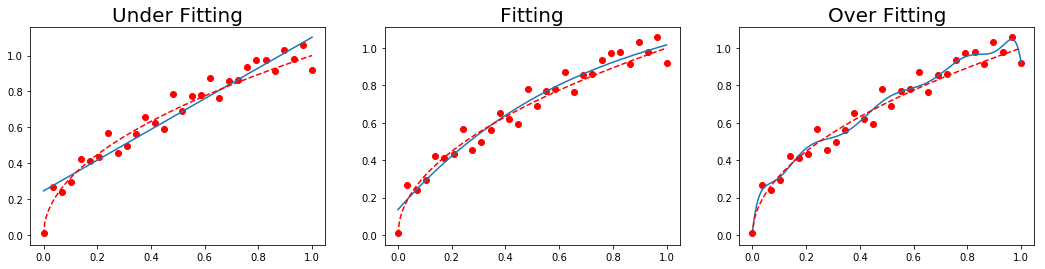

In [12]:
plt.figure(figsize=(18, 4))
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)

In [13]:
for m in models:
    print('model coeffs: {0}'.format(m.coeffs))

model coeffs: [0.85646898 0.24528526]
model coeffs: [ 0.27574459 -1.01845434  1.62396623  0.13556134]
model coeffs: [-1.45973847e+04  7.32115140e+04 -1.56594359e+05  1.86298315e+05
 -1.34811199e+05  6.09739356e+04 -1.70679634e+04  2.83342464e+03
 -2.57864455e+02  1.24861211e+01  1.84236682e-02]


Text(-90, -50, 'L2: $y = 0.2452852596405347 + 0.8564689774486048x$')

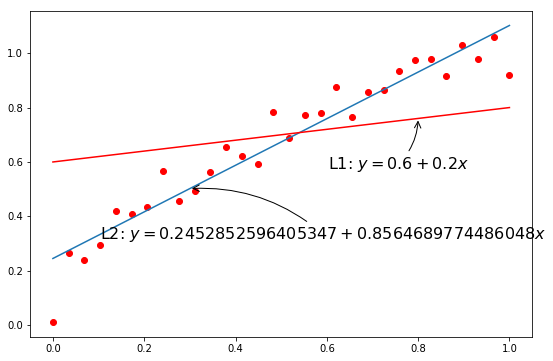

In [14]:
# 针对一阶多项式的模型，不同的参数拟合出来的直线和训练样本对应的位置关系
coeffs_1d = [0.2, 0.6]

plt.figure(figsize=(9, 6))
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'ro', t, models[0](t), '-', t, np.poly1d(coeffs_1d)(t), 'r-')
plt.annotate(r'L1: $y = {1} + {0}x$'.format(coeffs_1d[0], coeffs_1d[1]),
             xy=(0.8, np.poly1d(coeffs_1d)(0.8)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'L2: $y = {1} + {0}x$'.format(models[0].coeffs[0], models[0].coeffs[1]),
             xy=(0.3, models[0](0.3)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))